# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[12, 16, 40, ..., 72,  1, 28],
       [21, 10, 50, ..., 69, 52, 56],
       [23, 89, 51, ..., 62, 71, 58],
       ...,
       [68, 77, 91, ..., 60, 18, 63],
       [53, 35, 64, ...,  6, 26, 44],
       [13, 22, 92, ..., 57, 53,  5]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
B = A[:, np.random.permutation(A.shape[1])]
B

array([[30, 75, 25, ..., 36, 46, 67],
       [24, 96, 92, ..., 19, 70, 26],
       [93,  0, 87, ..., 76, 82, 65],
       ...,
       [54, 55, 50, ..., 12, 54, 74],
       [84, 37, 67, ..., 50, 24,  7],
       [64, 13, 66, ..., 33, 21,  7]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
A = np.random.randint(0, 100, size=(200, 50))
sum_in_row = A[:, ::2].sum(axis=1)
mean_sum_in_row = A[:, 1::2].sum(axis=1).mean()
B = A[sum_in_row > mean_sum_in_row]
print(B)

[[65 19 12 ... 77 86 51]
 [23 64 42 ... 83 95 69]
 [85 86 79 ... 49 97 10]
 ...
 [89 58 83 ... 42 67 11]
 [22 53 81 ... 17 53 13]
 [32  4 75 ... 31  4 64]]


# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
A = np.random.randint(0, 100, size=(200, 50))
np.argmax(np.ptp(A, axis=1))




8

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
print(A.ravel().argsort().reshape(A.shape) + 1)

[[2270 3024  489 ... 5844 6259  627]
 [ 711 3970 7172 ... 1318 4448 2954]
 [3874 3498 9788 ... 9524 7506 8952]
 ...
 [ 181 5945 2936 ... 7736 1677 4855]
 [2496 2101 9684 ... 1381 4167 6022]
 [1108 9835 6032 ... 3178 9297 3809]]


# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
np.transpose((A.T - np.min(A, axis=1)) / (np.max(A, axis=1) - np.min(A, axis=1)))

array([[0.66666667, 0.61290323, 0.20430108, ..., 0.75268817, 1.        ,
        0.22580645],
       [0.6185567 , 0.67010309, 0.74226804, ..., 0.84536082, 0.79381443,
        0.        ],
       [0.81914894, 0.35106383, 0.67021277, ..., 0.        , 0.72340426,
        0.63829787],
       ...,
       [0.94680851, 0.72340426, 0.18085106, ..., 0.32978723, 0.31914894,
        0.30851064],
       [0.67676768, 0.67676768, 0.11111111, ..., 0.31313131, 0.74747475,
        0.7979798 ],
       [0.41052632, 1.        , 0.21052632, ..., 0.42105263, 0.97894737,
        0.78947368]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
C = np.tile(A, (10, 1))
C = C.reshape(10, *A.shape) * np.arange(1, 11).reshape(10, 1, 1)
print(C, C.shape)

[[[ 67  62  24 ...  75  98  26]
  [ 61  66  73 ...  83  78   1]
  [ 82  38  68 ...   5  73  65]
  ...
  [ 91  70  19 ...  33  32  31]
  [ 67  67  11 ...  31  74  79]
  [ 42  98  23 ...  43  96  78]]

 [[134 124  48 ... 150 196  52]
  [122 132 146 ... 166 156   2]
  [164  76 136 ...  10 146 130]
  ...
  [182 140  38 ...  66  64  62]
  [134 134  22 ...  62 148 158]
  [ 84 196  46 ...  86 192 156]]

 [[201 186  72 ... 225 294  78]
  [183 198 219 ... 249 234   3]
  [246 114 204 ...  15 219 195]
  ...
  [273 210  57 ...  99  96  93]
  [201 201  33 ...  93 222 237]
  [126 294  69 ... 129 288 234]]

 ...

 [[536 496 192 ... 600 784 208]
  [488 528 584 ... 664 624   8]
  [656 304 544 ...  40 584 520]
  ...
  [728 560 152 ... 264 256 248]
  [536 536  88 ... 248 592 632]
  [336 784 184 ... 344 768 624]]

 [[603 558 216 ... 675 882 234]
  [549 594 657 ... 747 702   9]
  [738 342 612 ...  45 657 585]
  ...
  [819 630 171 ... 297 288 279]
  [603 603  99 ... 279 666 711]
  [378 882 207 ... 387 864 7

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
D = np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)
print(D)

[[67 24 22 ... 95 75 26]
 [61 73  5 ... 86 83  1]
 [82 68 14 ...  5  5 65]
 ...
 [91 19  6 ... 73 33 31]
 [67 11 91 ... 75 31 79]
 [42 23 17 ...  3 43 78]]


# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
A = np.random.randint(0, 100, size=(200, 50))
E=np.all(A > 5, axis = 1).sum()
print(E.sum())

4


# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
A = np.random.randint(0, 100, size=(200, 50))
F = np.array(np.split(A, 10)).mean(axis=0)
print(F, F.shape)

[[64.  47.6 51.1 71.2 33.2 38.  47.9 56.7 58.2 49.8 52.2 37.3 45.7 45.2
  31.9 37.7 35.5 54.9 48.5 55.3 51.2 56.6 57.5 47.1 51.7 52.1 52.6 56.2
  44.1 48.8 49.8 56.6 43.2 29.7 53.2 35.3 59.9 45.9 35.  46.7 56.2 52.4
  44.2 56.6 39.7 62.3 36.8 58.8 63.  48.8]
 [38.2 49.6 49.6 33.7 63.  44.4 58.8 51.5 55.8 51.7 63.  43.8 63.4 63.1
  43.2 57.  58.9 54.  44.9 52.  41.3 55.7 57.4 64.5 48.1 56.5 54.4 51.
  50.8 48.4 38.2 48.1 54.5 61.5 39.3 50.2 54.7 56.6 42.1 61.3 48.7 54.5
  50.2 63.4 39.1 51.3 55.9 50.9 46.8 54.9]
 [42.6 67.4 52.3 55.3 53.4 40.9 37.8 38.4 40.2 52.1 53.2 52.  45.3 47.4
  43.9 61.  31.3 42.3 40.7 57.4 51.2 52.7 44.8 42.4 43.2 50.7 32.  36.5
  37.7 48.5 40.9 29.4 37.4 60.3 53.  59.5 37.5 49.4 54.7 56.4 36.1 58.4
  59.1 47.8 51.7 35.6 45.7 50.9 56.1 39.6]
 [38.8 54.3 43.9 43.5 46.1 52.7 44.  35.6 66.4 44.5 61.1 59.1 35.9 44.5
  39.4 50.2 34.5 63.1 57.4 63.4 46.1 41.2 63.8 51.3 40.3 40.1 66.1 44.9
  25.6 39.8 26.4 64.5 47.8 56.8 45.  47.8 43.5 60.1 56.1 43.7 50.8 39.3
  43.7 3

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
A = np.random.randint(0, 100, size=(200, 50))
B = np.unique(A, return_index=True)[1]
C=np.sort(B)
D=A.ravel()[C]
print(D)

[67 72 77 79 34 49 40 76 75 89 83 58 96 21 11  8 73 27 97 53 57 33 90 30
 25 50 38 63  7 39 37 48 41  0 42 55 85 59 26 81 13  9 35  5 68 92 95 56
 99 23 22 91 52 29 93 10 71 45 60 87  3 88 47 86 51 84 82 43 32 14 17 28
  1 24 61 15 98 54 64 31  2 19 80 12  6 36 69 16 62 78 20 46 18 94 74 66
 65 70  4 44]


# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
#initializing two arrays
A = np.random.randint(0, 100, size=(200, 50))
B = A.mean(axis=0)
#computing the Euclidan distance
C = A - B
dis=np.sqrt(np.sum(np.square(C), axis=1))
print("Euclidean Distance: ", dis)

Euclidean Distance:  [211.05776034 204.54363398 210.69484616 208.73830075 231.33585585
 206.9618762  197.66749404 197.36070582 187.1426146  202.64680654
 188.09489148 202.62262509 202.01204964 169.205166   186.55076574
 205.78772607 196.31099867 208.35846083 209.92245759 203.24595494
 200.30948105 212.96010941 195.03891458 215.04055013 203.09521954
 193.53213738 228.07417258 196.84978588 201.1094682  208.49838896
 227.78026297 186.65805153 217.91465807 212.35881945 226.43806703
 195.48613301 209.27942613 202.03167623 210.17996622 236.42694051
 207.08876889 197.22243331 231.55024984 211.67325811 202.54221338
 194.0785104  188.24884648 201.28014855 197.1293692  209.17406197
 206.08158142 215.87222656 221.25740259 207.1473828  197.02131408
 214.76386614 205.57526164 219.24079958 208.6040944  218.21314855
 202.42904485 211.37825858 211.50070496 164.60928953 198.54815084
 188.84146314 225.34005015 213.44305611 192.88008762 203.07739461
 197.08122234 208.7591392  226.74108185 214.87428464 19

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
A = np.random.randint(0, 100, size=(200, 50))
B = np.where(A < 50, A * 2, A * 3)
print(B,B.shape)

[[ 76 201  44 ... 285 177 234]
 [168  12  86 ... 222  92 234]
 [ 66 270   2 ...  30  80 198]
 ...
 [237  14  64 ...  64 240   4]
 [ 68 168  10 ...  16 180 285]
 [207  56 291 ...  80  60  96]] (200, 50)


# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
def moving_average(X, N=3):
    cumsum = np.cumsum(X, dtype=float) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
A = np.random.randint(0, 100, size=(200, 50))  
B = np.concatenate((A, np.zeros((2, 50))), axis=0)
C = moving_average(B, 3)
D = moving_average(B, 5)
E = moving_average(B, 10)
D = np.pad(D, ((0,  C.shape[0] - D.shape[0])), 'constant')
E = np.pad(E, ((0,  C.shape[0] - E.shape[0])), 'constant')
H = np.concatenate((C, D, E))
print(H)
print(H.shape)
print(C.sum(axis=0))
print(D.sum(axis=0))
print(E.sum(axis=0))  

[27.33333333 21.         20.         ...  0.          0.
  0.        ]
(30291,)
493458.3333333334
493438.0
493319.20000000007


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 23
         Function evaluations: 46


ValueError: x and y must have same first dimension, but have shapes (200,) and (199,)

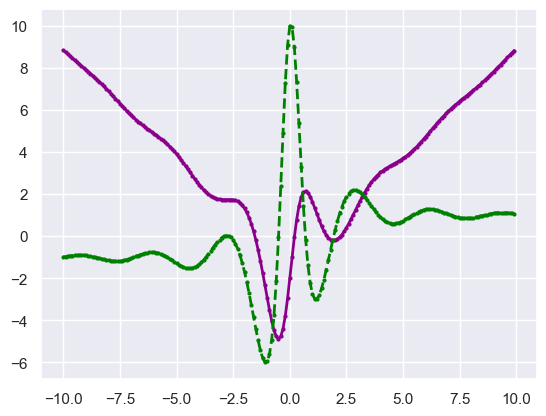

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.misc import derivative

def f(x):
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

x = np.arange(-10, 10, 0.1)
y = f(x)
diff = derivative(f, x, dx=1e-6)

Function_min = fmin(f, np.array([0]))

Function_1 = moving_average(y, 1)
Function_2 = moving_average(y, 2)
Function_5 = moving_average(y, 5)
Figure, sub_plot = plt.subplots()
sub_plot.plot(x, y, label='f(x)', color='darkmagenta', linewidth=2, linestyle='-', marker='o', markersize=2)
sub_plot.plot(x, diff, label='f\'(x)', color='green', linewidth=2, linestyle='--', marker='o', markersize=2)
sub_plot.plot(x, Function_1, label='moving average 1', color='crimson', linewidth=2, linestyle='--', marker='o', markersize=2)
sub_plot.plot(x[1:], Function_2, label='moving average 2', color='black', linewidth=2, linestyle='--', marker='o', markersize=2)
sub_plot.plot(x[4:], Function_5, label='moving average 5', color='yellow', linewidth=2, linestyle='--', marker='o', markersize=2)
sub_plot.plot(Function_min, f(Function_min), label='min', color='red', linewidth=2, linestyle='--', marker='o', markersize=2)

plt.show()



# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [ ]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[3, 0, 4, 4, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [ ]:
def sample(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    idx = np.searchsorted(np.cumsum(x), val)
    return idx

sample(np.array([50, 3, 1, 7, 20]), 5)

array([0, 0, 0, 2, 0], dtype=int64)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [ ]:
import random 
import timeit 
def walk(n: int):
    cur_position = 0 # walk method
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])
    #returns current position after each random step
    return cur_position

walk(10_000)#call the function walk
timeit.timeit("walk(n=10000)", number=1, globals=globals()) # calculates the total loops and time per loop

0.0033606999986659503

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

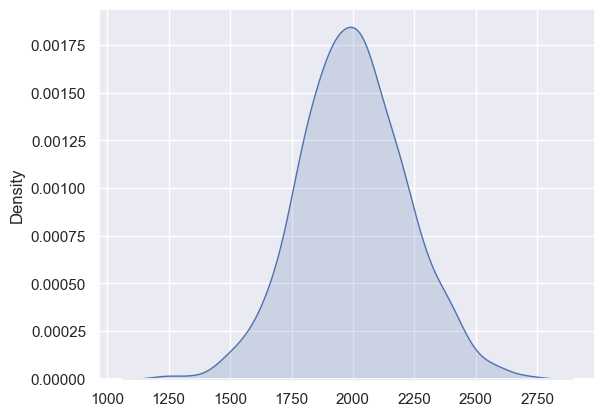

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def walk(n: int):
    return np.random.choice([-3, -1, 0, 2, 3], size=n).sum()

walk(10_000)

timeit.timeit('walk(10_000)', globals=globals(), number=1)

sns.kdeplot([walk(10_000) for _ in range(1000)], fill=True, alpha=0.2)
plt.show()



# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [ ]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.8924771949245737

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [ ]:
import taichi as ti
import time
ti.init(arch=ti.cpu)
import numpy as np
def strange_conv(a:ti ) -> ti.f64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

t0 = time.time()
a = np.random.random((10000, 10000))
print('PI =', strange_conv())
t1 = time.time()
print(f'{t1 - t0:.3} sec')

[Taichi] Starting on arch=x64


TypeError: strange_conv() missing 1 required positional argument: 'a'